In [17]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.tsa.api as tsa
import statsmodels.tsa.arima as arima
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment
from sklearn.metrics import mean_squared_error

from arch import arch_model
import scipy.stats as stats

In [5]:
ticker = 'FOXA'
source = 'yahoo'
start_date = '2022-08-05'  # Replace with your desired start date
end_date = '2024-08-05'    # Replace with your desired end date

# Fetch the data
data = yf.download(ticker, start=start_date, end=end_date)

# Resample the data to weekly frequency
#tsm_weekly = tsm_data.resample('W').ffill().dropna()
# Display the first few rows
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2022-08-05  33.169998  33.525002  32.869999  33.330002  32.302879  1930300
2022-08-08  33.490002  33.759998  33.279999  33.470001  32.438564  2643100
2022-08-09  33.580002  34.000000  33.389999  33.740002  32.700245  2526800
2022-08-10  34.790001  35.500000  34.029999  34.880001  33.805111  3566100
2022-08-11  35.180000  36.549999  35.180000  36.430000  35.307343  2739700


[*********************100%%**********************]  1 of 1 completed

Forecasted Prices:
2024-08-11    18.799868
2024-08-18    18.919306
2024-08-25    18.796823
2024-09-01    18.672131
2024-09-08    18.669058
2024-09-15    18.596795
2024-09-22    18.596175
2024-09-29    18.659059
2024-10-06    18.669703
2024-10-13    18.701318
2024-10-20    18.727513
2024-10-27    18.708725
Freq: W-SUN, Name: predicted_mean, dtype: float64


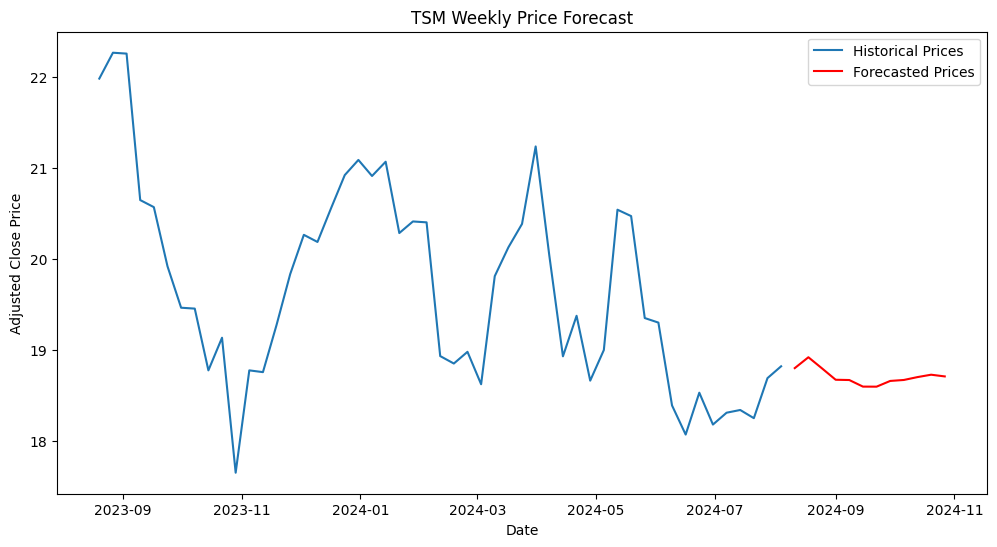

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Fetch the weekly data
ticker = 'UBER'
start_date = '2023-08-05'
end_date = '2024-08-05'

tsm_data = yf.download(ticker, start=start_date, end=end_date)
tsm_weekly = tsm_data.resample('W').ffill().dropna()

# Step 2: Calculate the returns (optional)
tsm_weekly['Returns'] = tsm_weekly['Adj Close'].pct_change().dropna()

# Step 3: Train an ARIMA model
# We'll use the adjusted close price for simplicity. You can also use returns.
tsm_weekly = tsm_weekly.dropna()
model = ARIMA(tsm_weekly['Adj Close'], order=(5, 1, 0))  # Adjust the order (p, d, q) as needed
model_fit = model.fit()

# Step 4: Forecast future prices
forecast_steps = 12  # Number of weeks to forecast
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=tsm_weekly.index[-1], periods=forecast_steps + 1, freq='W')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Print the forecasted values
print("Forecasted Prices:")
print(forecast_series)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(tsm_weekly['Adj Close'], label='Historical Prices')
plt.plot(forecast_series, label='Forecasted Prices', color='red')
plt.title('TSM Weekly Price Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


Forecasted Prices:
2024-08-06    148.850232
2024-08-07    146.787874
2024-08-08    146.533318
2024-08-09    146.880578
2024-08-12    146.951387
2024-08-13    146.682482
2024-08-14    146.831417
2024-08-15    146.866509
2024-08-16    146.839314
2024-08-19    146.819158
2024-08-20    146.853738
2024-08-21    146.842955
2024-08-22    146.838853
2024-08-23    146.840384
2024-08-26    146.844294
2024-08-27    146.840538
2024-08-28    146.841312
2024-08-29    146.841755
2024-08-30    146.841838
2024-09-02    146.841263
2024-09-03    146.841651
2024-09-04    146.841602
2024-09-05    146.841567
2024-09-06    146.841526
2024-09-09    146.841601
2024-09-10    146.841562
2024-09-11    146.841565
2024-09-12    146.841566
2024-09-13    146.841574
2024-09-16    146.841565
Freq: B, Name: predicted_mean, dtype: float64


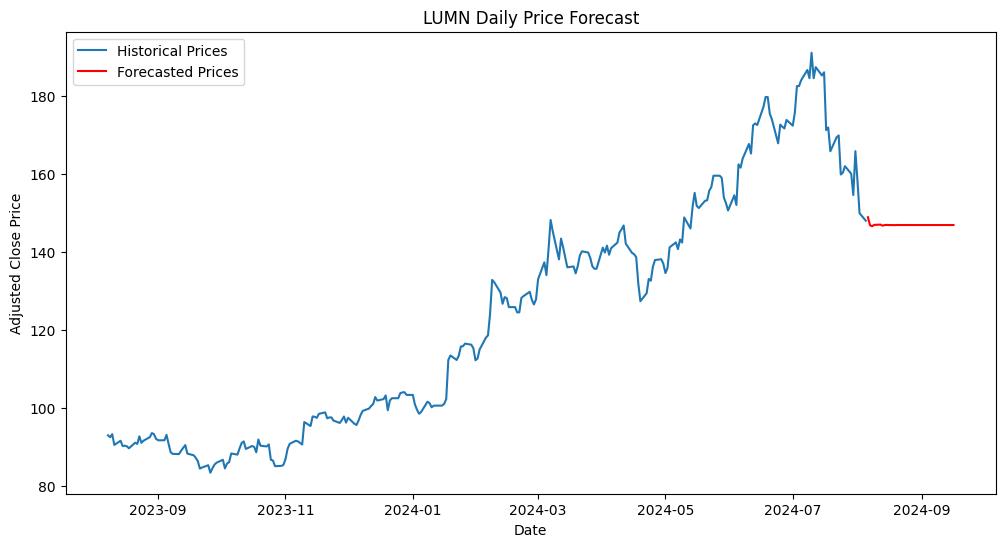

In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Fetch the daily data
ticker = 'TSM'
start_date = '2023-08-05'
end_date = '2024-08-06'

tsm_data = yf.download(ticker, start=start_date, end=end_date)
tsm_daily = tsm_data.asfreq('B').ffill().dropna()  # Using business days frequency

# Step 2: Calculate the returns (optional)
tsm_daily['Returns'] = tsm_daily['Adj Close'].pct_change().dropna()

# Step 3: Train an ARIMA model
# We'll use the adjusted close price for simplicity. You can also use returns.
tsm_daily = tsm_daily.dropna()
model = ARIMA(tsm_daily['Adj Close'], order=(5, 1, 0))  # Adjust the order (p, d, q) as needed
model_fit = model.fit()

# Step 4: Forecast future prices
forecast_steps = 30  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=tsm_daily.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Print the forecasted values
print("Forecasted Prices:")
print(forecast_series)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(tsm_daily['Adj Close'], label='Historical Prices')
plt.plot(forecast_series, label='Forecasted Prices', color='red')
plt.title('LUMN Daily Price Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


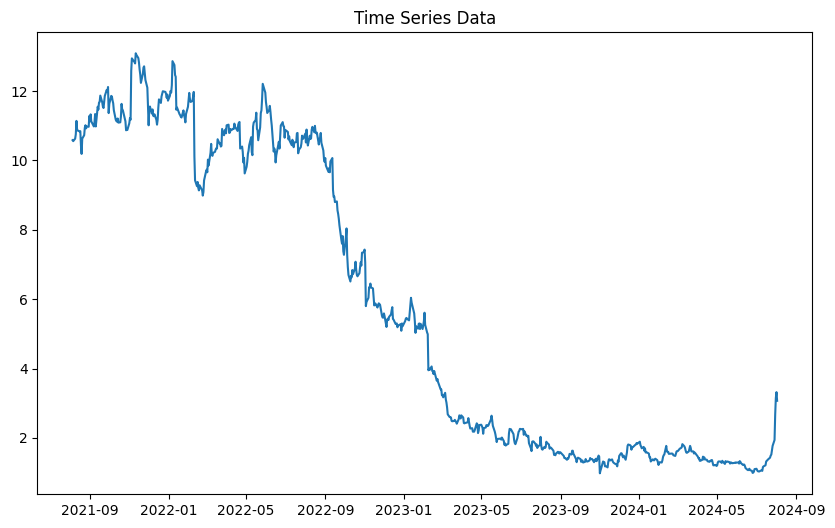

/Users/divitpurwar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


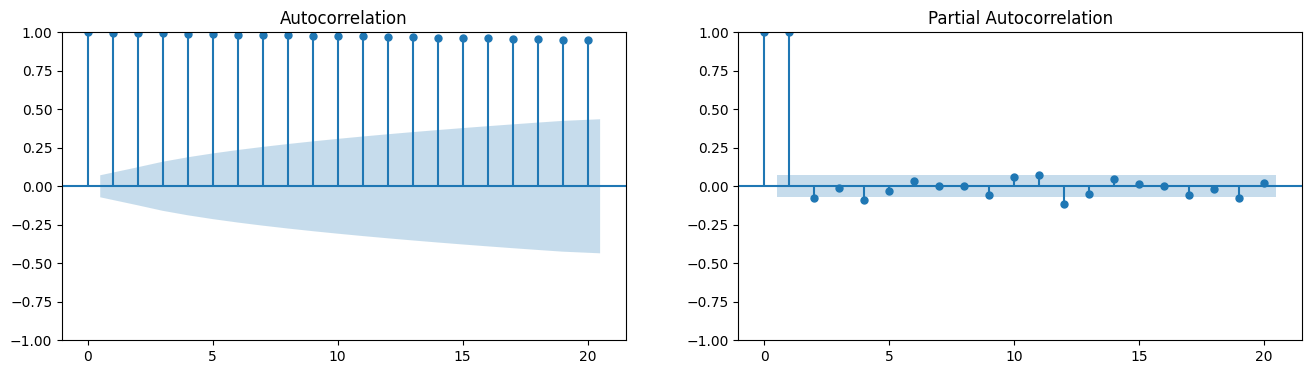

/Users/divitpurwar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/divitpurwar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/divitpurwar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  753
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 128.427
Date:                Tue, 06 Aug 2024   AIC                           -250.853
Time:                        22:43:48   BIC                           -236.985
Sample:                             0   HQIC                          -245.510
                                - 753                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6210      0.188     -3.296      0.001      -0.990      -0.252
ma.L1          0.7009      0.176      3.976      0.000       0.355       1.046
sigma2         0.0416      0.001     54.593      0.0

/Users/divitpurwar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


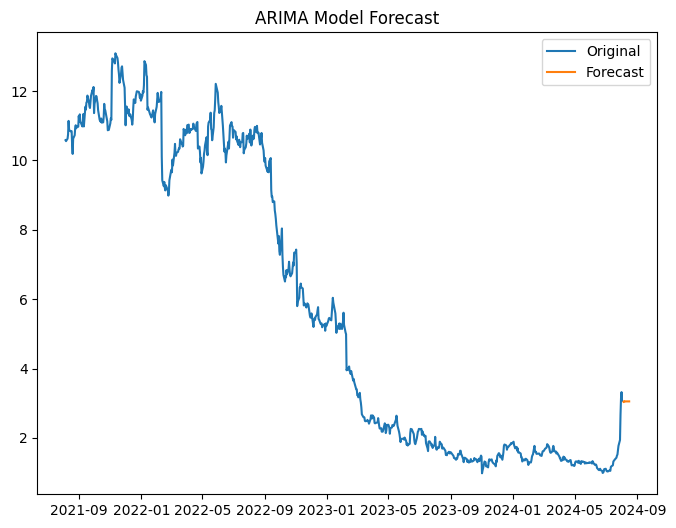

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Fetch the data from Yahoo Finance
ticker = 'LUMN'  # Example: Apple Inc.
start_date = '2021-08-05'
end_date = '2024-08-05'

# Download the data
data = yf.download(ticker, start=start_date, end=end_date)

# Use the 'Close' price for the ARIMA model
time_series = data['Adj Close']

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title('Time Series Data')
plt.show()

# Plot ACF and PACF to determine p and q
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(time_series, lags=20, ax=axes[0])
plot_pacf(time_series, lags=20, ax=axes[1])
plt.show()

# Define the ARIMA model
p = 1  # autoregressive order
d = 1  # differencing order
q = 1  # moving average order

# Fit the model
model = ARIMA(time_series, order=(p, d, q))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast future values
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(8, 6))
plt.plot(time_series, label='Original')
plt.plot(pd.date_range(start=time_series.index[-1], periods=forecast_steps+1, freq='B')[1:], forecast, label='Forecast')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import requests
from bs4 import BeautifulSoup
from itertools import product
from pmdarima.arima import auto_arima


tickers = ['PLTR']

# Function to determine optimal ARIMA parameters

forecast_days = 2
growth_data = []

for ticker in tickers:
    try:
        data = yf.download(ticker, start='2020-01-01', end='2024-08-07')

        data.index = pd.to_datetime(data.index)
        data = data.asfreq('B').ffill().dropna() 

        time_series = data['Adj Close'].dropna()

        model = auto_arima(time_series, seasonal=False, stepwise=True, trace=True)
        model_fit = model.fit(time_series)

        forecast = model_fit.predict(n_periods=forecast_days)
        last_close_price = time_series.iloc[-1]  
        forecasted_growth = (forecast[-1] - last_close_price) / last_close_price  

        growth_data.append((ticker, forecasted_growth))

    except Exception as e:
        print(f"Could not process ticker {ticker}: {e}")
        continue

# Determine the ticker with the most growth
most_growth_ticker, most_growth_value = max(growth_data, key=lambda x: x[1], default=(None, None))

if most_growth_ticker:
    print(f"The ticker with the most growth in the next {forecast_days} days is {most_growth_ticker} with an estimated growth of {most_growth_value:.2%}")
else:
    print("No tickers were processed successfully.")


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2430.630, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2458.696, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2457.726, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2457.967, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2457.127, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2459.258, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2460.377, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2431.969, Time=0.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2432.048, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2459.193, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2456.396, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2454.716, Time=0.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2434.232, Time=0.81 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2429.112, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]          

/var/folders/60/4nmmb7v946sbdb31fgwl008c0000gn/T/ipykernel_87236/2700209148.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_growth = (forecast[-1] - last_close_price) / last_close_price


In [4]:
print(growth_data)

[('PLTR', -0.00299160547705376)]


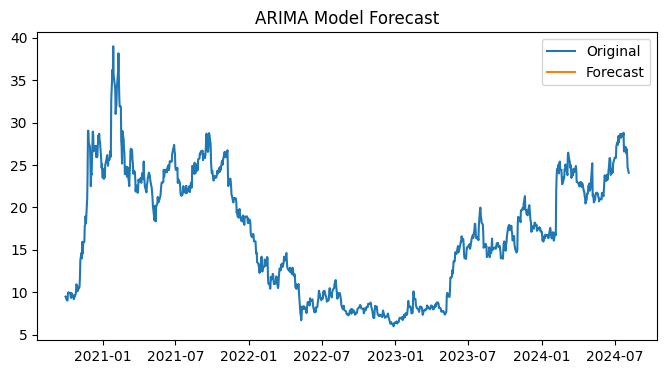

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(time_series, label='Original')
plt.plot(pd.date_range(start=time_series.index[-1], periods=forecast_days+1, freq='B')[1:], forecast, label='Forecast')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()